In [1]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

In [3]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [4]:
# Use the citipy module to determine city based on latitude and longitude.
from citipy import citipy

In [5]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

630

In [6]:
# Import requests dependency to perform API requests and do a version check
import requests
requests.__version__
# Import API key for requests
from config import weather_key
# Build the base url
# url = "https://api.openweathermap.org/data/2.5/weather?units=imperial&lat={lat}&lon={lon}&appid=" + weather_key
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_key

# Import the time library and the datetime module from the datetime library 
import time
from datetime import datetime

In [7]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
        time.sleep(60)

    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1

# Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | bluff
Processing Record 2 of Set 1 | attawapiskat
City not found. Skipping...
Processing Record 3 of Set 1 | norman wells
Processing Record 4 of Set 1 | bilma
Processing Record 5 of Set 1 | kaeo
Processing Record 6 of Set 1 | taolanaro
City not found. Skipping...
Processing Record 7 of Set 1 | kargasok
Processing Record 8 of Set 1 | aracati
Processing Record 9 of Set 1 | the valley
Processing Record 10 of Set 1 | nuevo progreso
Processing Record 11 of Set 1 | sentyabrskiy
City not found. Skipping...
Processing Record 12 of Set 1 | tasiilaq
Processing Record 13 of Set 1 | georgetown
Processing Record 14 of Set 1 | tabiauea
City not found. Skipping...
Processing Record 15 of Set 1 | opobo
City not found. Skipping...
Processing Record 16 of Set 1 | dedza
Processing Record 17 of Set 1 | castro
Processing Record 18 of Set 1 | new norfolk
Processing Record 19 of Set 1 | qaanaaq
Processing Record 20 of 

Processing Record 34 of Set 4 | touros
Processing Record 35 of Set 4 | lorengau
Processing Record 36 of Set 4 | terney
Processing Record 37 of Set 4 | yaan
Processing Record 38 of Set 4 | daru
Processing Record 39 of Set 4 | zhigansk
Processing Record 40 of Set 4 | salalah
Processing Record 41 of Set 4 | tebingtinggi
Processing Record 42 of Set 4 | kruisfontein
Processing Record 43 of Set 4 | port elizabeth
Processing Record 44 of Set 4 | maarianhamina
Processing Record 45 of Set 4 | lata
Processing Record 46 of Set 4 | raudeberg
Processing Record 47 of Set 4 | pafos
Processing Record 48 of Set 4 | grand river south east
City not found. Skipping...
Processing Record 49 of Set 4 | kavieng
Processing Record 50 of Set 4 | road town
Processing Record 1 of Set 5 | kharp
Processing Record 2 of Set 5 | dakoro
Processing Record 3 of Set 5 | ilulissat
Processing Record 4 of Set 5 | tucuma
Processing Record 5 of Set 5 | paciran
Processing Record 6 of Set 5 | edgewater
Processing Record 7 of Set 

Processing Record 28 of Set 8 | alofi
Processing Record 29 of Set 8 | baruun-urt
Processing Record 30 of Set 8 | hamilton
Processing Record 31 of Set 8 | barra do garcas
Processing Record 32 of Set 8 | kabansk
Processing Record 33 of Set 8 | vila franca do campo
Processing Record 34 of Set 8 | ukiah
Processing Record 35 of Set 8 | bukama
Processing Record 36 of Set 8 | gizo
Processing Record 37 of Set 8 | cam ranh
Processing Record 38 of Set 8 | santa marta
Processing Record 39 of Set 8 | smithers
Processing Record 40 of Set 8 | warrnambool
Processing Record 41 of Set 8 | adana
Processing Record 42 of Set 8 | kenai
Processing Record 43 of Set 8 | inta
Processing Record 44 of Set 8 | rawson
Processing Record 45 of Set 8 | ambilobe
Processing Record 46 of Set 8 | poplar bluff
Processing Record 47 of Set 8 | indramayu
Processing Record 48 of Set 8 | charleston
Processing Record 49 of Set 8 | puerto del rosario
Processing Record 50 of Set 8 | izhma
Processing Record 1 of Set 9 | saldanha
P

Processing Record 15 of Set 12 | pierre
Processing Record 16 of Set 12 | fayaoue
Processing Record 17 of Set 12 | leningradskiy
Processing Record 18 of Set 12 | tepulco
Processing Record 19 of Set 12 | cherskiy
Processing Record 20 of Set 12 | margate
Processing Record 21 of Set 12 | ormara
Processing Record 22 of Set 12 | viligili
City not found. Skipping...
Processing Record 23 of Set 12 | gorgan
Processing Record 24 of Set 12 | santa vitoria do palmar
Processing Record 25 of Set 12 | mackay
Processing Record 26 of Set 12 | miajadas
Processing Record 27 of Set 12 | eberndorf
Processing Record 28 of Set 12 | eha amufu
Processing Record 29 of Set 12 | yelkhovka
Processing Record 30 of Set 12 | broken hill
Processing Record 31 of Set 12 | verkhnevilyuysk
Processing Record 32 of Set 12 | buala
Processing Record 33 of Set 12 | cockburn town
Processing Record 34 of Set 12 | lewiston
Processing Record 35 of Set 12 | yar-sale
Processing Record 36 of Set 12 | palmer
Processing Record 37 of Se

In [8]:
len(city_data)

578

In [9]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)

In [10]:
new_column_order = ['City','Country','Date','Lat','Lng','Max Temp','Humidity','Cloudiness','Wind Speed']
city_data_df = city_data_df[new_column_order]
city_data_df.head(10)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Bluff,NZ,2022-07-24 14:08:49,-46.6000,168.3333,37.80,83,18,3.58
1,Norman Wells,CA,2022-07-24 14:08:50,65.2820,-126.8329,58.05,65,86,4.99
2,Bilma,NE,2022-07-24 14:08:50,18.6853,12.9164,108.37,11,8,13.22
3,Kaeo,NZ,2022-07-24 14:08:51,-35.1000,173.7833,57.33,96,100,23.91
4,Kargasok,RU,2022-07-24 14:08:51,59.0556,80.8572,51.76,86,100,8.68
5,Aracati,BR,2022-07-24 14:08:52,-4.5617,-37.7697,87.55,50,99,12.28
6,The Valley,AI,2022-07-24 14:08:52,18.2170,-63.0578,85.10,74,20,16.11
7,Nuevo Progreso,MX,2022-07-24 14:08:52,23.1667,-97.9500,83.53,71,91,1.01
8,Tasiilaq,GL,2022-07-24 14:08:53,65.6145,-37.6368,44.76,84,46,5.93
9,Georgetown,MY,2022-07-24 14:04:19,5.4112,100.3354,84.13,79,20,0.00


In [11]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [12]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

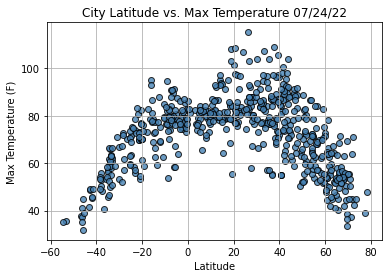

In [68]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities", c="steelblue", facecolor="white")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

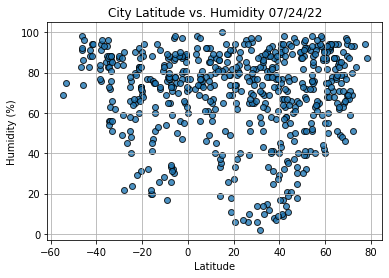

In [14]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities", c="steelblue", facecolor="white")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

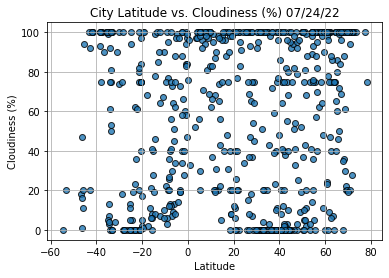

In [15]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities", c="steelblue", facecolor="white")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

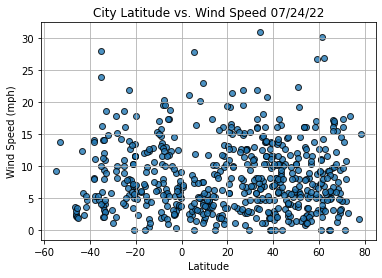

In [16]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities", c="steelblue", facecolor="white")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()

In [73]:
# Import linregress
from scipy.stats import linregress

# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):

    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values, edgecolor="black",
            linewidths=1, c="darkcyan", facecolor="white")
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.title(title)
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()
    print(f"The r-value for this plot is {round(r_value,3)}.")

In [74]:
# Create Northern and Southern Hemisphere DataFrames.
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

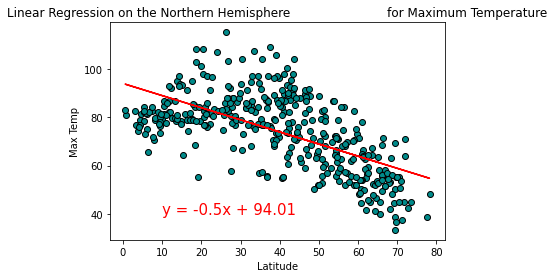

The r-value for this plot is -0.628.


In [75]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(10,40))

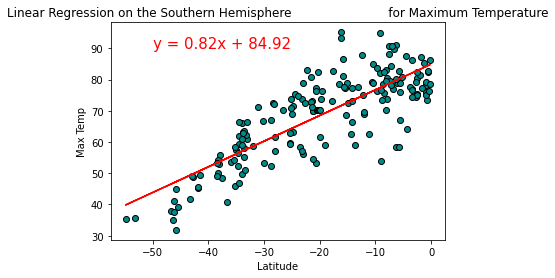

The r-value for this plot is 0.815.


In [76]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(-50,90))

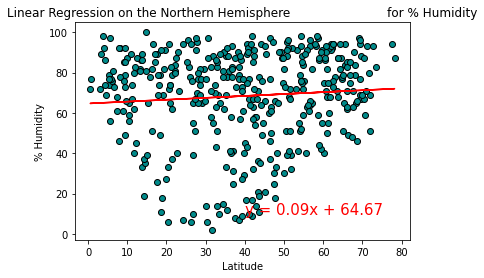

The r-value for this plot is 0.078.


In [77]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for % Humidity', '% Humidity',(40,10))

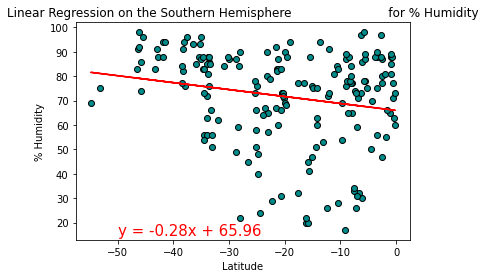

The r-value for this plot is -0.2.


In [78]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for % Humidity', '% Humidity',(-50,15))

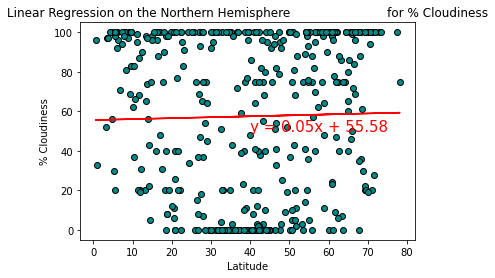

The r-value for this plot is 0.023.


In [79]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for % Cloudiness', '% Cloudiness',(40,50))

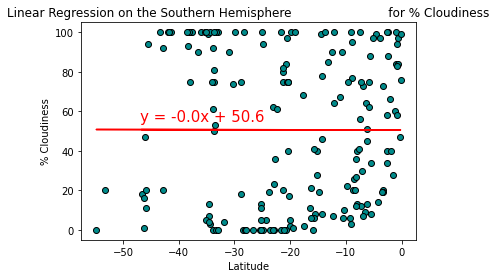

The r-value for this plot is -0.001.


In [80]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for % Cloudiness', '% Cloudiness',(-47,55))

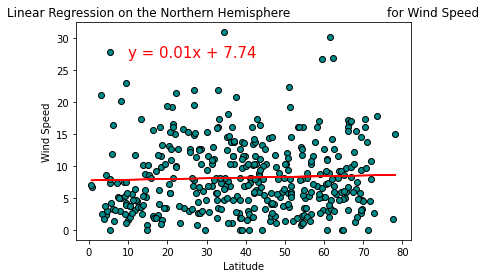

The r-value for this plot is 0.038.


In [81]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Wind Speed', 'Wind Speed',(10,27))

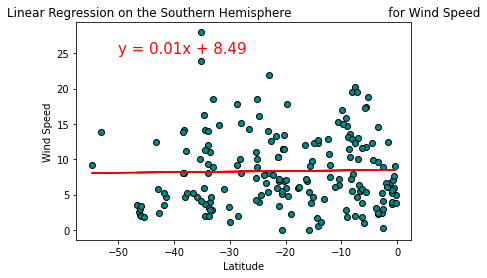

The r-value for this plot is 0.021.


In [82]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Wind Speed', 'Wind Speed',(-50,25))